In [20]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading data
customer_complaints_df = pd.read_csv("../Resources/ModelData/train_test_data.csv")
customer_complaints_df.head()

,Product,Consumer complaint narrative
0,Credit card,16 date description debit 60 2 purchase 30 9 6...
1,Checking or savings account,due longer since notified dollar received leav...
2,Credit card,fcra asked due longer since please ive 19 plen...
3,Credit card,unwanted letter due additional alert received ...
4,Credit card,investigation also prehistoric issue possibly ...


In [3]:
# Define features set
X = customer_complaints_df['Consumer complaint narrative']
X.head()

0    16 date description debit 60 2 purchase 30 9 6...
1    due longer since notified dollar received leav...
2    fcra asked due longer since please ive 19 plen...
3    unwanted letter due additional alert received ...
4    investigation also prehistoric issue possibly ...
Name: Consumer complaint narrative, dtype: object

In [4]:
# Define target vector
y = customer_complaints_df['Product']
y.head()

0                    Credit card
1    Checking or savings account
2                    Credit card
3                    Credit card
4                    Credit card
Name: Product, dtype: object

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of each set
print("Training features:", X_train.shape)
print("Testing features:", X_test.shape)
print("Training labels:", y_train.shape)
print("Testing labels:", y_test.shape)

Training features: (6284,)
Testing features: (1572,)
Training labels: (6284,)
Testing labels: (1572,)


In [6]:
# Creating StandardScaler instance
scaler = StandardScaler() 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    customer_complaints_df['Consumer complaint narrative'],
    customer_complaints_df['Product'],
    test_size=0.2,
    random_state=42
)

In [8]:
# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Use the top 5000 words
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [9]:
# Preprocess categorical features using one-hot encoding
label_encoder = LabelEncoder()
labels = customer_complaints_df['Product']
y = label_encoder.fit_transform(labels)

In [10]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [11]:
# Fitting Standard Scaller
X_train_dense = X_train_tfidf.toarray()
X_scaler = scaler.fit(X_train_dense)

In [12]:
# Scaling data
max_abs_scaler = MaxAbsScaler()
X_train_scaled = max_abs_scaler.fit_transform(X_train_tfidf)
X_test_scaled = max_abs_scaler.transform(X_test_tfidf)

In [13]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [14]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [15]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [16]:
# Assuming y_test and predictions are available
cm = confusion_matrix(y_test, predictions)

# Check unique classes in y_test and predictions
classes = np.unique(np.concatenate((y_test, predictions)))
class_labels = [f"Class {label}" for label in classes]

# Create DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=[f"Actual {label}" for label in classes],
                     columns=[f"Predicted {label}" for label in classes])

# Display confusion matrix DataFrame
print(cm_df)

# Calculate accuracy score
acc_score = accuracy_score(y_test, predictions)
print("Accuracy Score:", acc_score)

          Predicted 0  Predicted 1
Actual 0          715           72
Actual 1           57          728
Accuracy Score: 0.9179389312977099


In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,715,72
Actual 1,57,728


Accuracy Score : 0.9179389312977099
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       787
           1       0.91      0.93      0.92       785

    accuracy                           0.92      1572
   macro avg       0.92      0.92      0.92      1572
weighted avg       0.92      0.92      0.92      1572



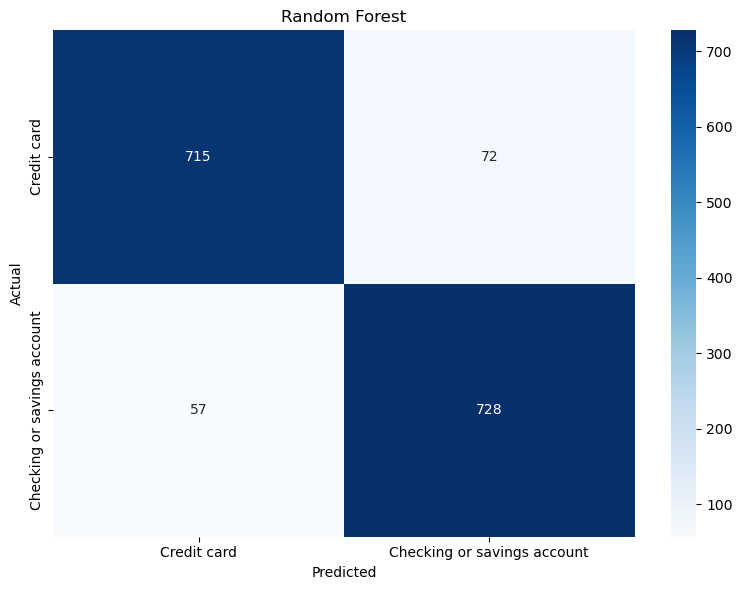

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title, labels):
    plt.figure(figsize=(8, 6))  # Adjust the figure size
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()  # Adjust layout for better visualization

# Labels for the confusion matrix
labels = customer_complaints_df['Product'].unique()

# Random Forest confusion matrix
plot_confusion_matrix(cm_df, "Random Forest", labels)

# Save the plot
plt.savefig("../images/confusion_matrix_heatmap_for_RM_A.png")
plt.show()


In [ ]:
# Save the plot
plt.savefig("../image/confusion_matrix_heatmap_for_RM_A.png")

In [ ]:
if isinstance(X, pd.Series):
    X = X.to_frame()  # Converts the Series to a DataFrame

In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [ ]:
# Save the model
with open('../Resources/ModelData/random_forest_model_A.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
# Save the vectorizer
with open('../Resources/ModelData/tfidf_vectorizer_A.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)
print("Random Forest Model and vectorizer saved with pickle.")

In [ ]:
# Load the model
with open('../Resources/ModelData/random_forest_model_A.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
# Load the vectorizer
with open('../Resources/ModelData/tfidf_vectorizer_A.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

In [ ]:
# Predict with the loaded model
sample_text = ['The bank added 10 late fees for insufficient funds.']
sample_tfidf = loaded_vectorizer.transform(sample_text)
predicted_class = loaded_model.predict(sample_tfidf)
print("Predicted class:", predicted_class)